# Tutorial 2: Simulated data

Now, we examine the second toy model that checks whether MVDM detects thin cell strings.

In [1]:
import ocelli as oci
import matplotlib as mpl
import scanpy as scp

mpl.rcParams['figure.dpi'] = 300

In [2]:
x = scp.read_h5ad('toy_model_2.h5ad')
x

AnnData object with n_obs × n_vars = 4500 × 1
    obs: 'celltype', 'pseudotime'
    obsm: 'view0', 'view1'

This toy model consists of two 3-dimensional, 4500-cell views. Cells are split equally into 9 cell types named after letters A-I.

The first view:

(<Figure size 1800x1200 with 1 Axes>, <AxesSubplot:>)

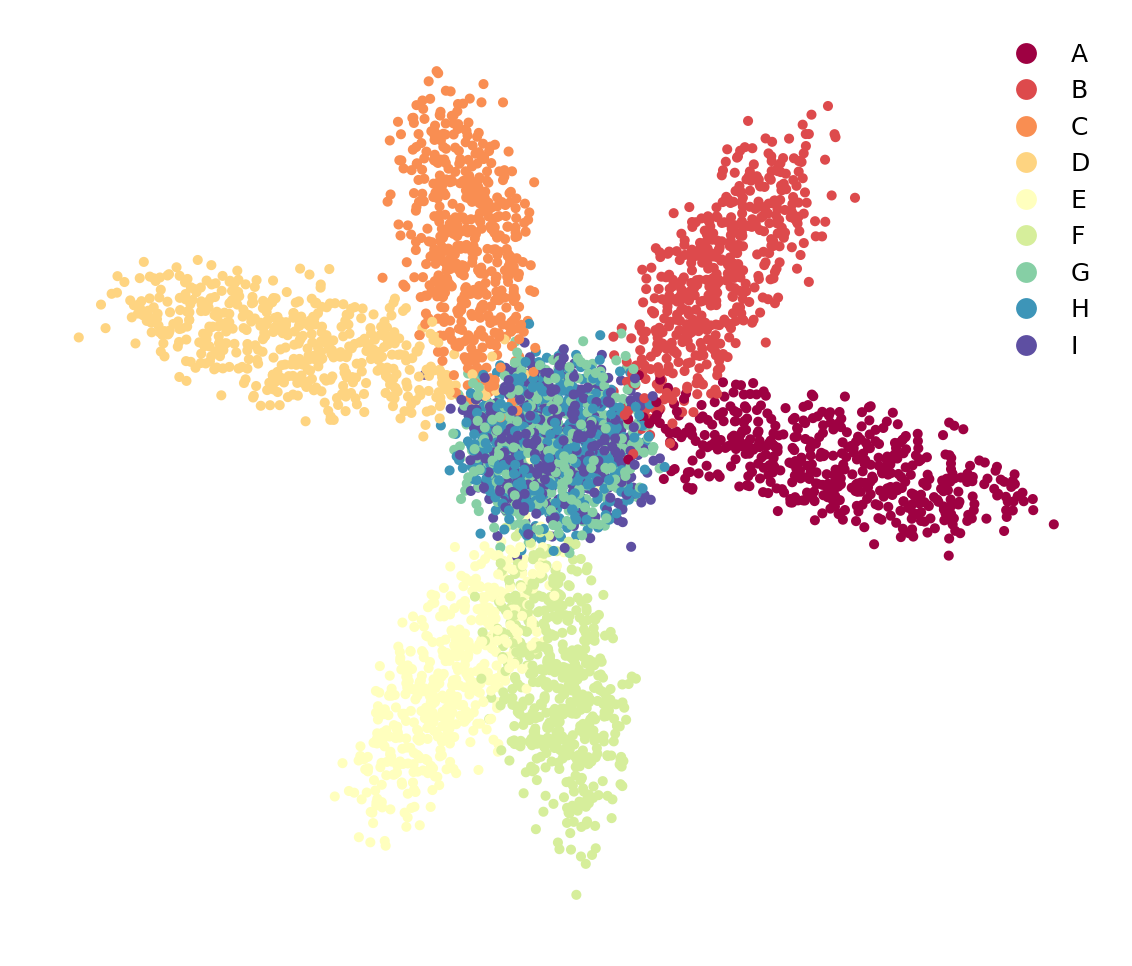

In [3]:
oci.tl.project_2d(x, x_key='view0', projection_key='view0_proj', alpha=-45, beta=120)
oci.pl.scatter(x, x_key='view0_proj', color_key='celltype', static=True, marker_size=2)

The second view:

(<Figure size 1800x1200 with 1 Axes>, <AxesSubplot:>)

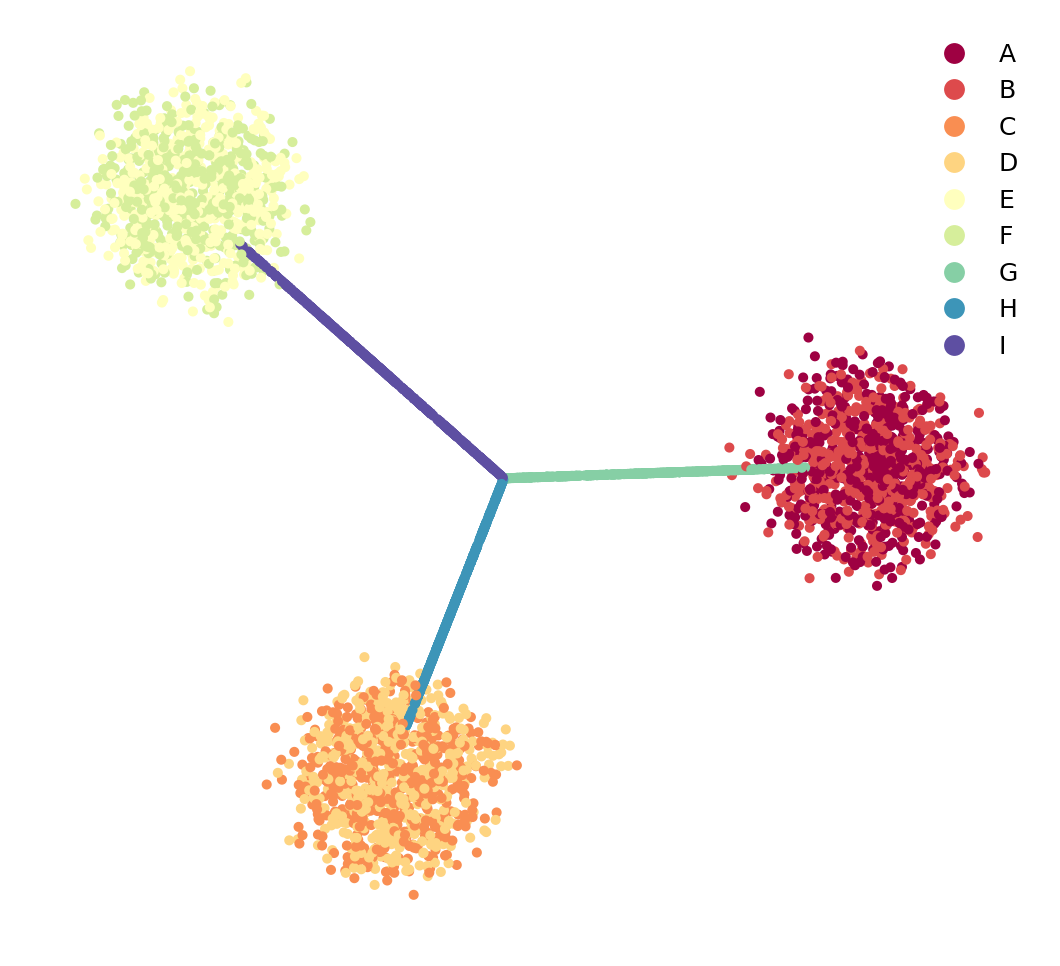

In [4]:
oci.tl.project_2d(x, x_key='view1', projection_key='view1_proj', alpha=45, beta=60)
oci.pl.scatter(x, x_key='view1_proj', color_key='celltype', static=True, marker_size=2)

The first view differentiates well between celltypes A-F, while G-I are mixed up. An inverse situation happens in the second view.

Now, we save begin the analysis, by defining which x.obsm keys store views.

In [5]:
x.uns['view_keys'] = ['view0', 'view1']

Subsequently, we calculate nearest neighbors and multi-view weights.

In [6]:
oci.pp.neighbors(x, n_neighbors=60, mode='sklearn')
oci.tl.weights(x)
x

60 nearest neighbors calculated.
Multi-view weights estimated.


AnnData object with n_obs × n_vars = 4500 × 1
    obs: 'celltype', 'pseudotime'
    uns: 'view_keys', 'neighbors', 'distances', 'epsilons'
    obsm: 'view0', 'view1', 'view0_proj', 'view1_proj', 'weights'

Let's see weights' distributions.

(<Figure size 1800x1200 with 18 Axes>,
 array([[<AxesSubplot:title={'center':'A'}, ylabel='view0'>,
         <AxesSubplot:title={'center':'B'}>,
         <AxesSubplot:title={'center':'C'}>,
         <AxesSubplot:title={'center':'D'}>,
         <AxesSubplot:title={'center':'E'}>,
         <AxesSubplot:title={'center':'F'}>,
         <AxesSubplot:title={'center':'G'}>,
         <AxesSubplot:title={'center':'H'}>,
         <AxesSubplot:title={'center':'I'}>],
        [<AxesSubplot:ylabel='view1'>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
         <AxesSubplot:>, <AxesSubplot:>]], dtype=object))

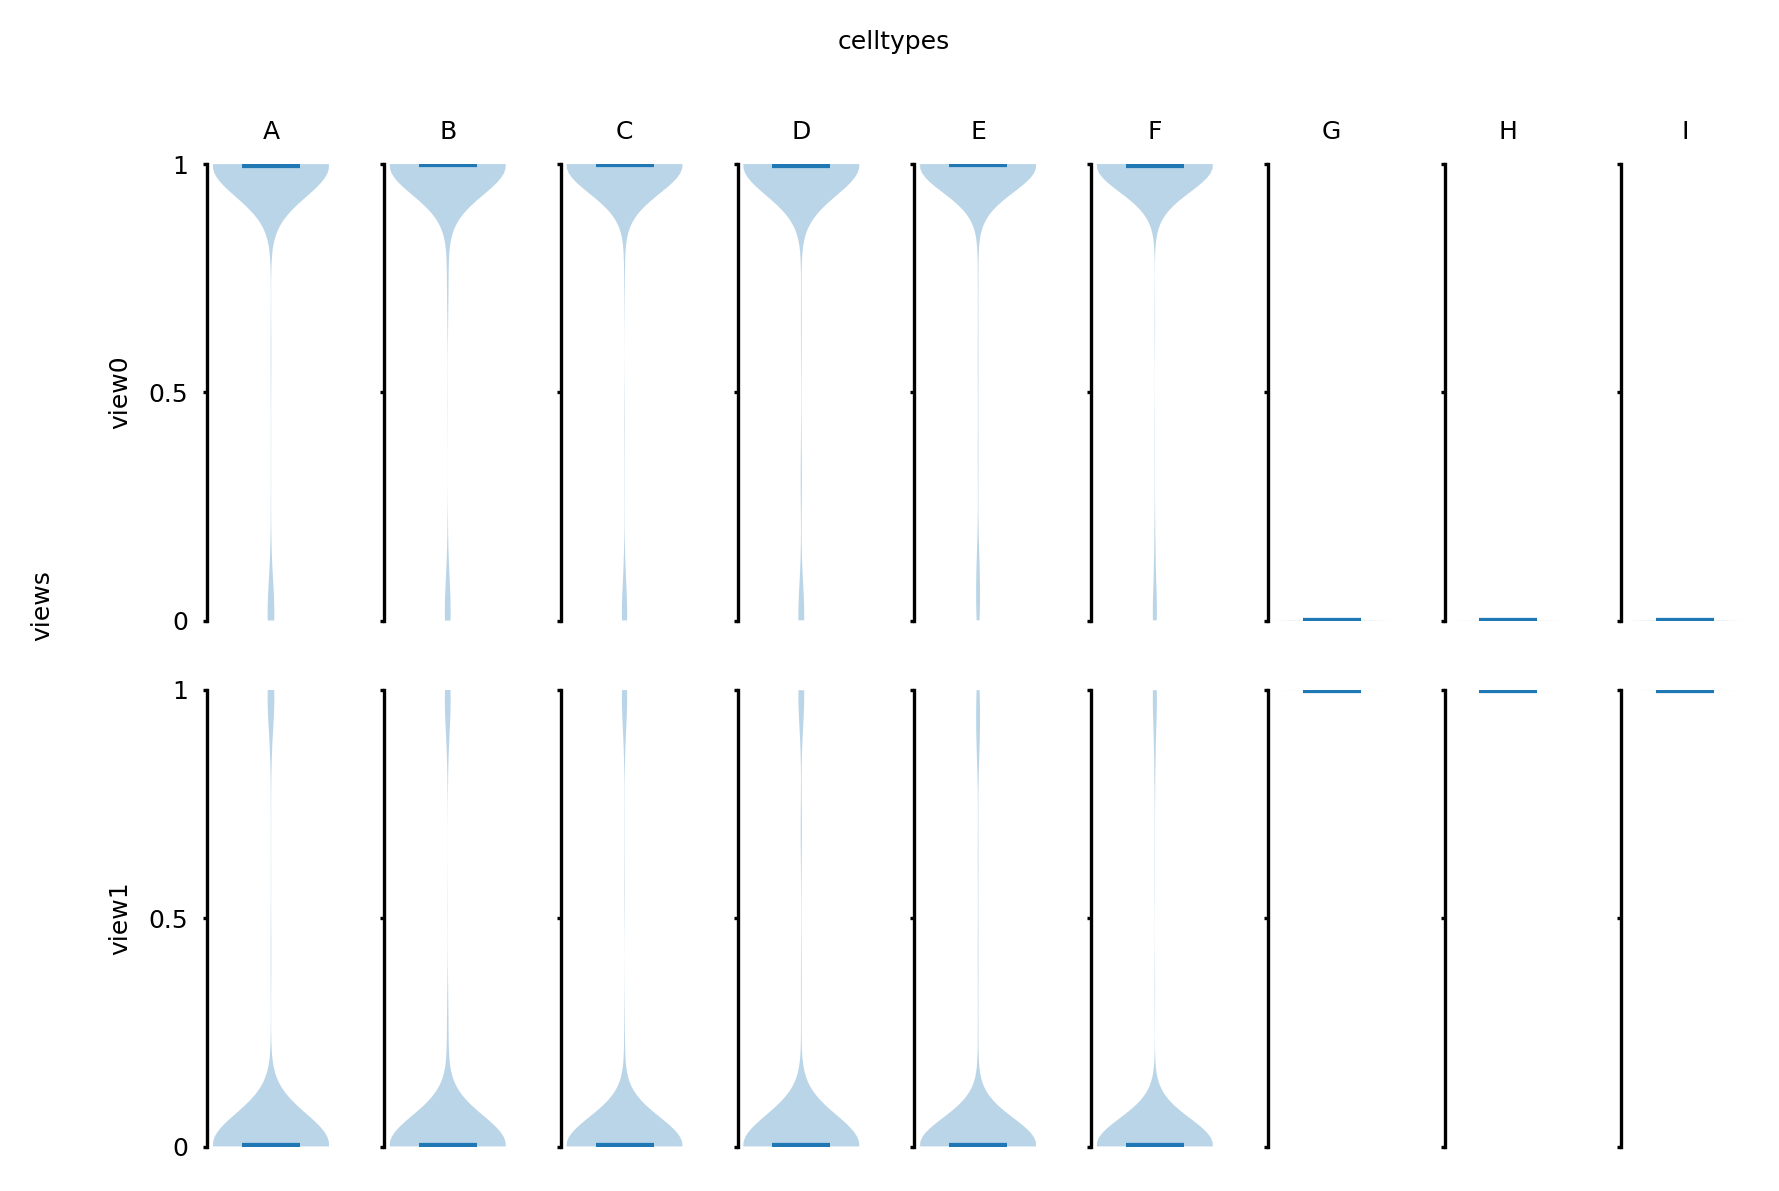

In [7]:
oci.pl.weights(x)

MVDM correctly detected which views are noisy for which cell types.

The multi-view weights are then used to calculate the multi-view diffusion maps embedding. In this case, it is 20-dimensional.

In [8]:
oci.tl.multi_view_diffusion_maps(x, n_comps=20, normalize_single_views=False)
x

20 multi-view diffusion maps components calculated.


AnnData object with n_obs × n_vars = 4500 × 1
    obs: 'celltype', 'pseudotime'
    uns: 'view_keys', 'neighbors', 'distances', 'epsilons'
    obsm: 'view0', 'view1', 'view0_proj', 'view1_proj', 'weights', 'x_mvdm'

Now, the nearest neighbors graph is constructed by performing the nearest neighbors search in the multi-view diffusion maps space.

In [9]:
oci.pp.neighbors(x, n_neighbors=75, neighbors_key='neighbors_mvdm', view_keys=['x_mvdm'])
oci.tl.nn_graph(x, n=75, neighbors_key='neighbors_mvdm')
x

75 nearest neighbors calculated.
Nearest neighbors-based graph constructed.


AnnData object with n_obs × n_vars = 4500 × 1
    obs: 'celltype', 'pseudotime'
    uns: 'view_keys', 'neighbors', 'distances', 'epsilons', 'neighbors_mvdm'
    obsm: 'view0', 'view1', 'view0_proj', 'view1_proj', 'weights', 'x_mvdm', 'graph'

The resulting nearest neighbors graph is visualized using the [ForceAtlas2](https://github.com/klarman-cell-observatory/forceatlas2) algorithm.

In [10]:
oci.tl.forceatlas2(x, n_steps=5000, is2d=True)
x

Apr 24, 2022 12:42:34 AM org.netbeans.modules.masterfs.watcher.Watcher getNotifierForPlatform
INFO: Native file watcher is disabled
Apr 24, 2022 12:42:36 AM org.gephi.io.processor.plugin.DefaultProcessor process
INFO: # Nodes loaded: 4,500 (4,500 added)
Apr 24, 2022 12:42:36 AM org.gephi.io.processor.plugin.DefaultProcessor process
INFO: # Edges loaded: 337,500 (190,004 added)


*************************25%
***

**********************50%
*************************75%
*************************100%
Time = 94.515s


AnnData object with n_obs × n_vars = 4500 × 1
    obs: 'celltype', 'pseudotime'
    uns: 'view_keys', 'neighbors', 'distances', 'epsilons', 'neighbors_mvdm'
    obsm: 'view0', 'view1', 'view0_proj', 'view1_proj', 'weights', 'x_mvdm', 'graph', 'x_fa2'

Let's have a look at dataset's metadata.

Cell types:

(<Figure size 1800x1200 with 1 Axes>, <AxesSubplot:>)

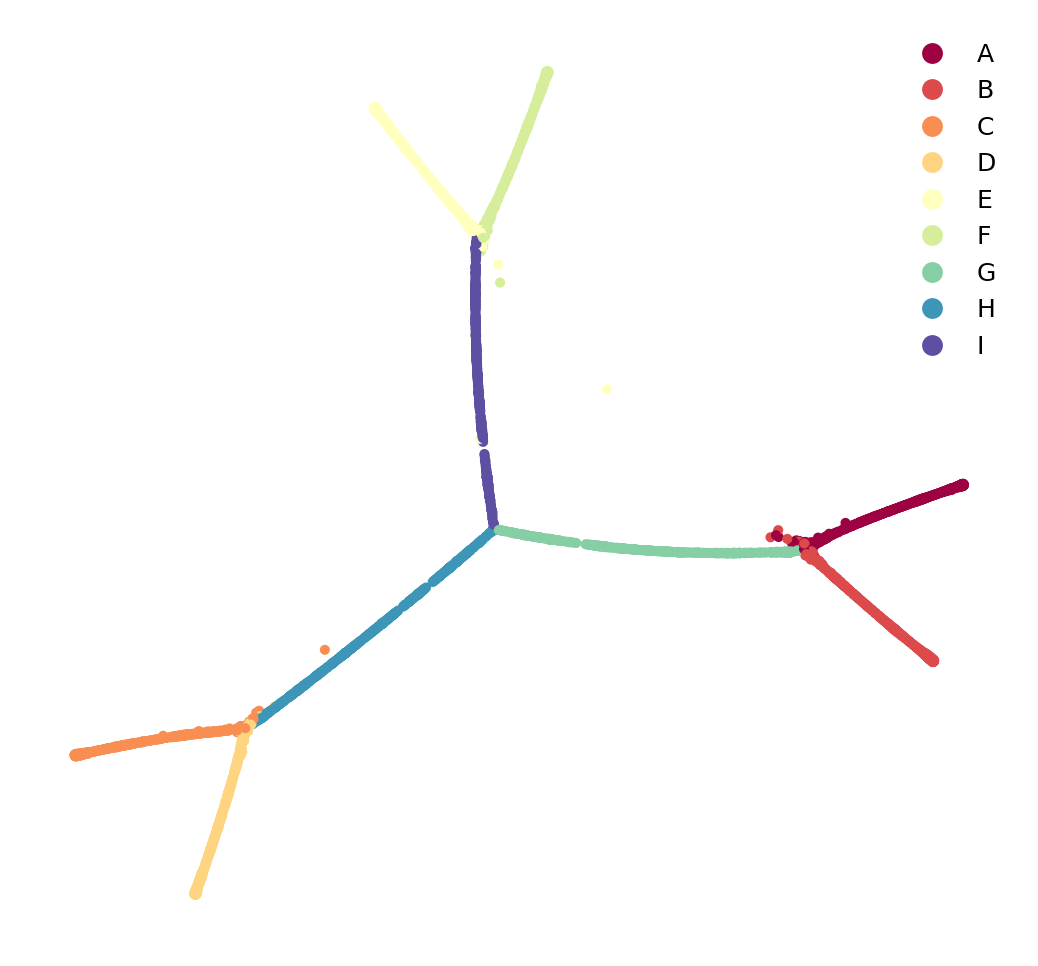

In [11]:
oci.pl.scatter(x, x_key='x_fa2', color_key='celltype', static=True, marker_size=2)

Cell development pseudotime:

(<Figure size 1800x1200 with 2 Axes>, <AxesSubplot:>)

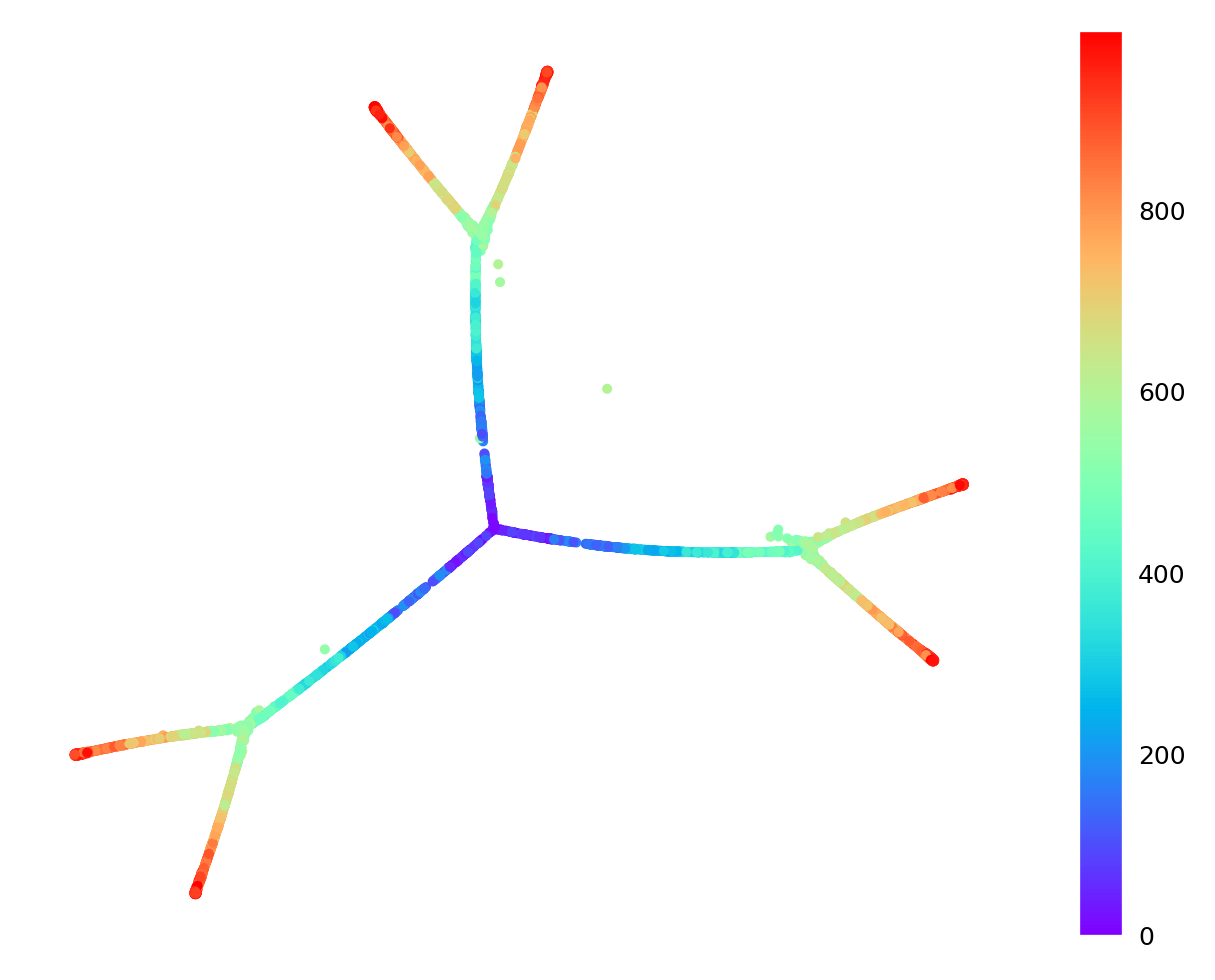

In [12]:
oci.pl.scatter(x, x_key='x_fa2', color_key='pseudotime', static=True, marker_size=2, cmap='rainbow')

The first view's weights:

(<Figure size 1800x1200 with 2 Axes>, <AxesSubplot:>)

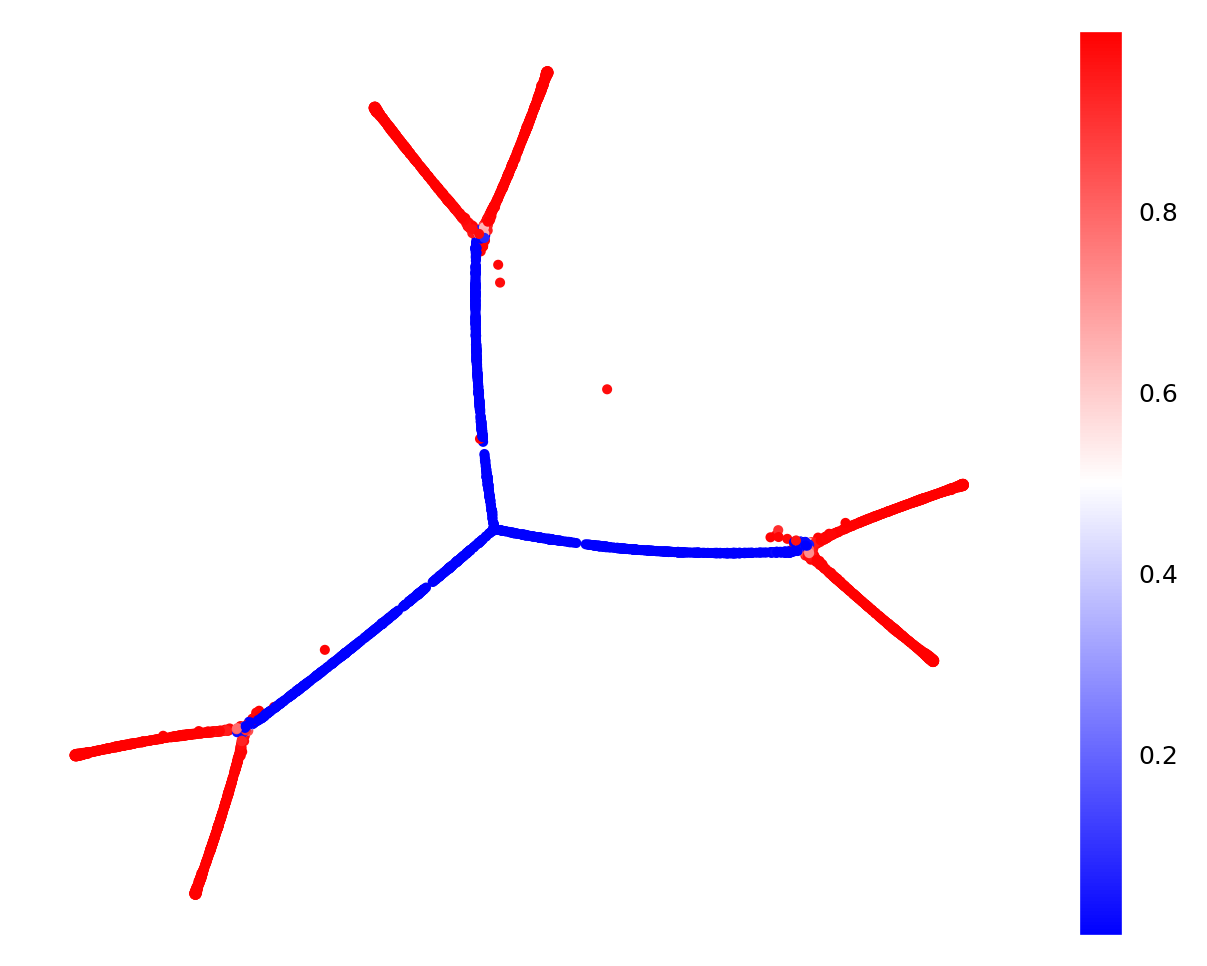

In [13]:
x.obs['weights_view0'] = list(x.obsm['weights']['view0'])
oci.pl.scatter(x, x_key='x_fa2', static=True, color_key='weights_view0', marker_size=2, cmap='bwr')

The second view's weights:

(<Figure size 1800x1200 with 2 Axes>, <AxesSubplot:>)

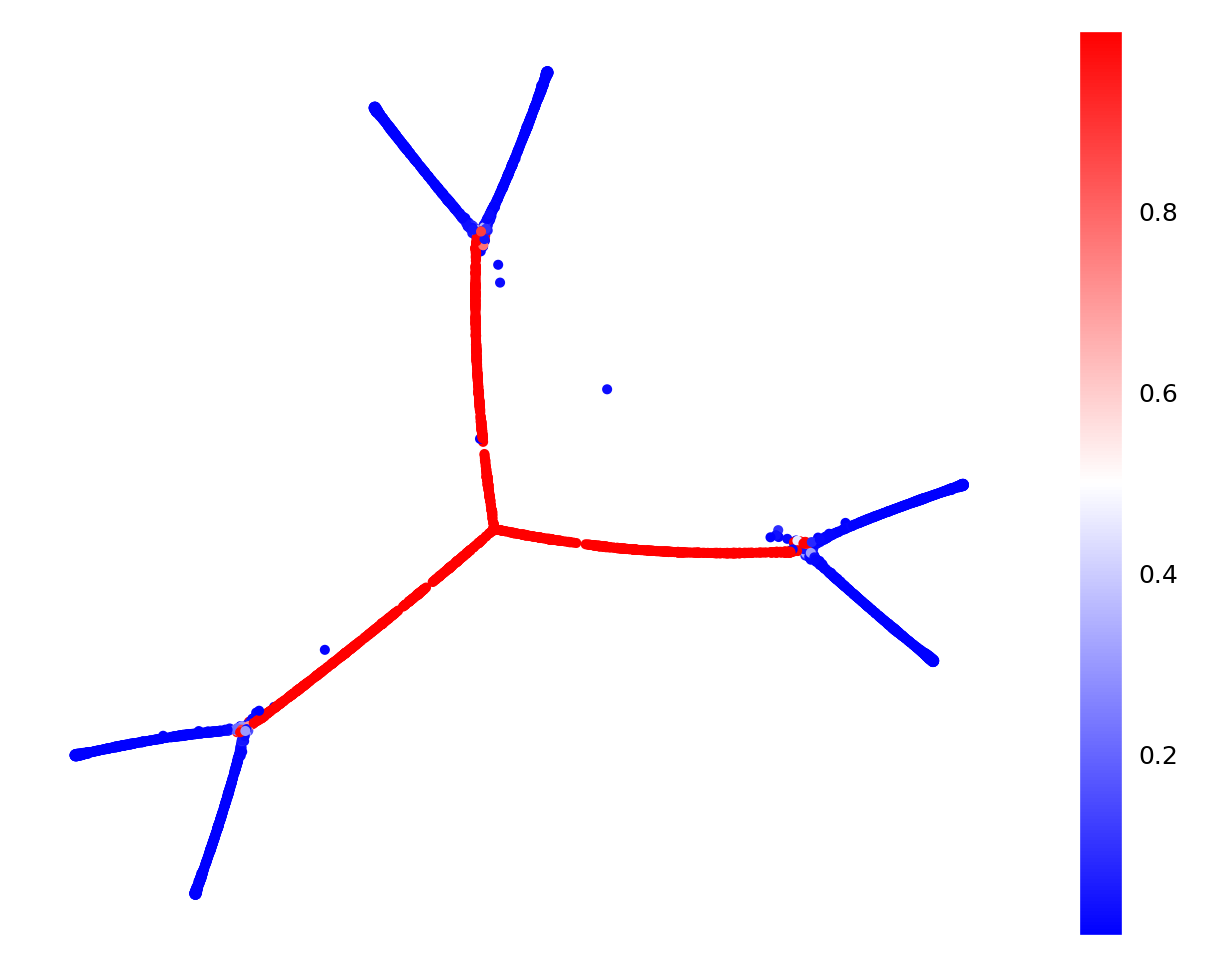

In [14]:
x.obs['weights_view1'] = list(x.obsm['weights']['view1'])
oci.pl.scatter(x, x_key='x_fa2', static=True, color_key='weights_view1', marker_size=2, cmap='bwr')